# Exploratory Data Analysis on SampleSuperstore Dataset

## OBJECTIVE

1. As a business manager, try to find out the weak areas where one can work to make more profit.

2. Try to find out the solutions to the business problems.

### Importing Required Python Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading SampleSuperstore Dataset

In [31]:
df=pd.read_csv('Samplesuperstore.csv')

### Data Cleaning

#### Checking for Null Values

In [32]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

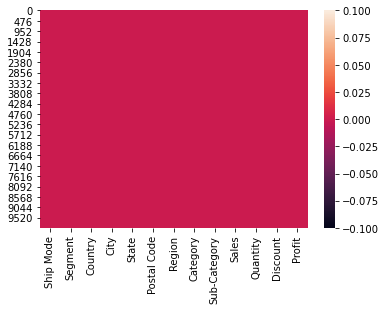

In [33]:
sns.heatmap(df.isnull())

#### Checking for Duplicate Values

In [34]:
df.duplicated().sum()

17

#### Removing Duplicates

In [29]:
df=df.drop_duplicates()


### Dropping Unnecessary Columns

In [40]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [38]:
df['Country'].unique()

array(['United States'], dtype=object)

### Considering that the Country and Postal Code Column Will Not Play Any Role for the Analysis

In [41]:
df=df.drop(['Country','Postal Code'],axis=1)

### Fetching all the Info from the Given Dataset

In [42]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [44]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Data Exploration

#### Plotting Correlation between Variables

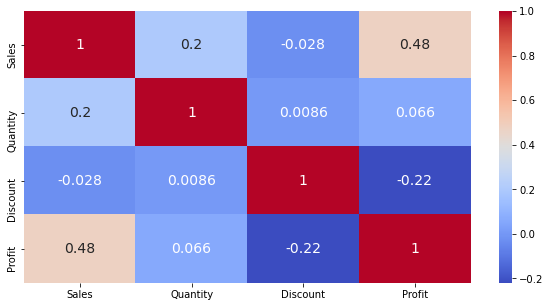

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':14},cmap='coolwarm')
plt.show()

### Overall Sales Summary

In [95]:
df1=pd.DataFrame({'Quantities':[df[df['Profit']>0]['Quantity'].sum(),df[df['Profit']==0]['Quantity'].sum(),df[df['Profit']<0]['Quantity'].sum()]},index=['Profit','No Profit','Loss'])

<AxesSubplot:ylabel='Percentage'>

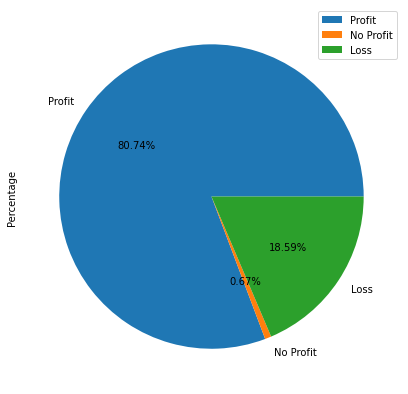

In [99]:
df1.plot.pie(y='Quantities',label='Percentage',figsize=(7,7),autopct='%1.2f%%')

## Overall Profit Analysis

### Plotting Segment, Ship Mode and Region-wise Profit

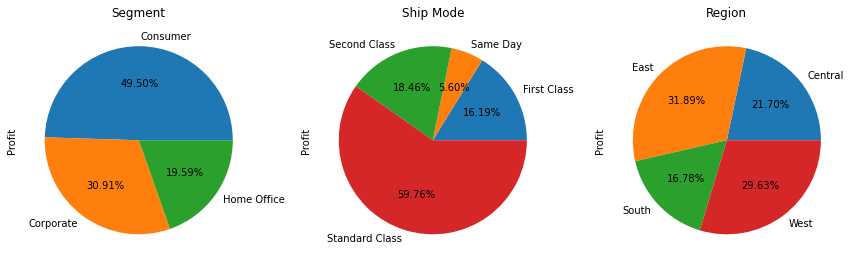

In [122]:
fig,axes=plt.subplots(nrows=1,ncols=3)
axes[0].set_title('Segment')
axes[1].set_title('Ship Mode')
axes[2].set_title('Region')
df[df['Profit']>0].groupby('Segment')['Profit'].sum().plot.pie(autopct='%1.2f%%',figsize=(12,12),ax=axes[0])
df[df['Profit']>0].groupby('Ship Mode')['Profit'].sum().plot.pie(autopct='%1.2f%%',figsize=(12,12),ax=axes[1])
df[df['Profit']>0].groupby('Region')['Profit'].sum().plot.pie(autopct='%1.2f%%',figsize=(12,12),ax=axes[2])
plt.tight_layout()

In [130]:
df['Quantity'].sum()

37873

### Total Items Sold: 37873

### Plotting Category and Subcategory-wise Profit

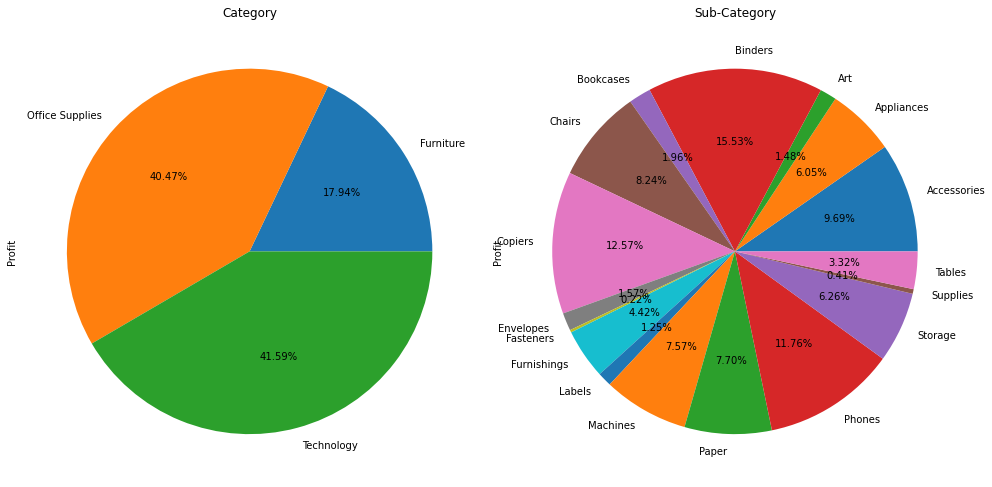

In [129]:
fig,axes=plt.subplots(nrows=1,ncols=2)
axes[0].set_title('Category')
df[df['Profit']>0].groupby('Category')['Profit'].sum().plot.pie(autopct='%1.2f%%',figsize=(12,12),ax=axes[0])
axes[1].set_title('Sub-Category')
df[df['Profit']>0].groupby('Sub-Category')['Profit'].sum().plot.pie(autopct='%1.2f%%',figsize=(14,14),ax=axes[1])
plt.tight_layout()

<AxesSubplot:title={'center':'Items Sold by Sub-Category'}, ylabel='Sub-Category'>

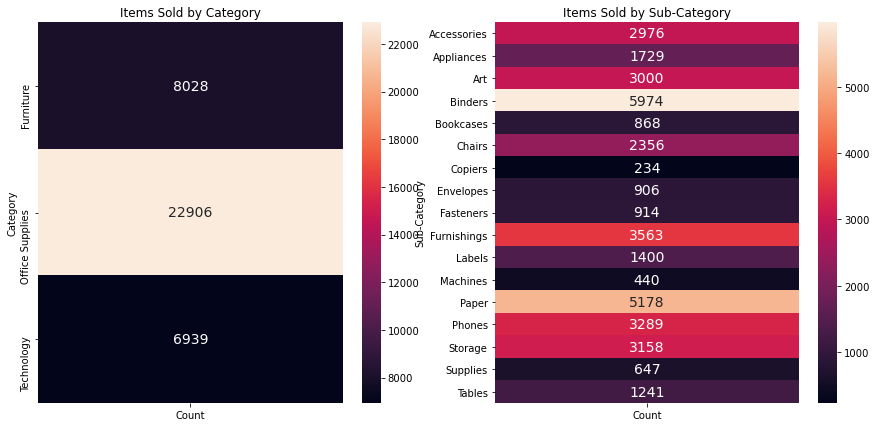

In [153]:
cat=df.groupby('Category')['Quantity'].sum().to_frame('Count')
sub_cat=df.groupby('Sub-Category')['Quantity'].sum().to_frame('Count')
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,7))
axes[0].set_title('Items Sold by Category')
axes[1].set_title('Items Sold by Sub-Category')
sns.heatmap(cat,ax=axes[0],annot=True,annot_kws={'size':14},fmt='2')
sns.heatmap(sub_cat,ax=axes[1],annot=True,annot_kws={'size':14},fmt='2')

### Category-wise Analysis 

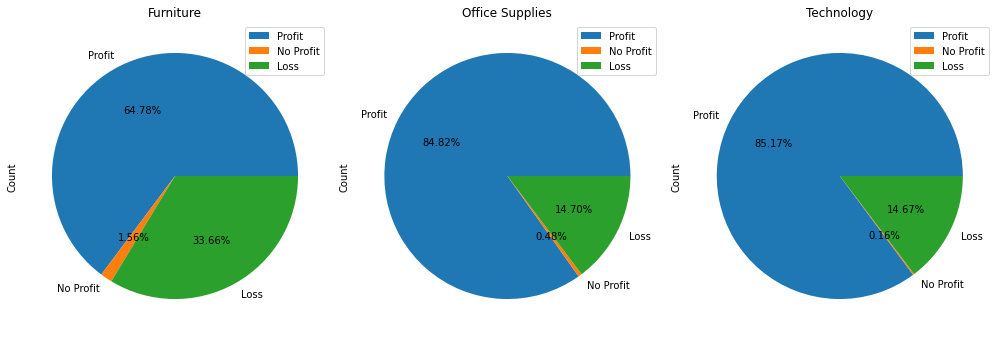

In [165]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(14,14))
axes[0].set_title('Furniture')
axes[1].set_title('Office Supplies')
axes[2].set_title('Technology')
df3=pd.DataFrame({'Count':[df[(df['Category']=='Furniture')&(df['Profit']>0)]['Profit'].count(),df[(df['Category']=='Furniture')&(df['Profit']==0)]['Profit'].count(),df[(df['Category']=='Furniture')&(df['Profit']<0)]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df4=pd.DataFrame({'Count':[df[(df['Category']=='Office Supplies')&(df['Profit']>0)]['Profit'].count(),df[(df['Category']=='Office Supplies')&(df['Profit']==0)]['Profit'].count(),df[(df['Category']=='Office Supplies')&(df['Profit']<0)]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df5=pd.DataFrame({'Count':[df[(df['Category']=='Technology')&(df['Profit']>0)]['Profit'].count(),df[(df['Category']=='Technology')&(df['Profit']==0)]['Profit'].count(),df[(df['Category']=='Technology')&(df['Profit']<0)]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df3.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[0])
df4.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[1])
df5.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[2])
plt.tight_layout()

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

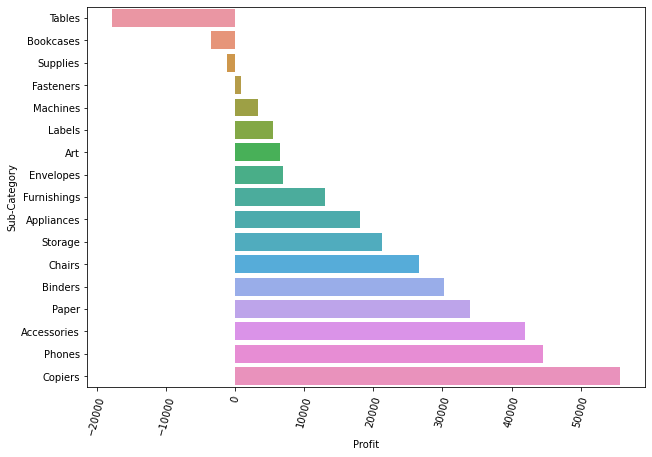

In [202]:
df7=df.groupby('Sub-Category').sum().sort_values('Profit')
plt.figure(figsize=(10,7))
plt.xticks(rotation=75)
sns.barplot(x=df7.Profit,y=df7.index)



### State-wise Analysis

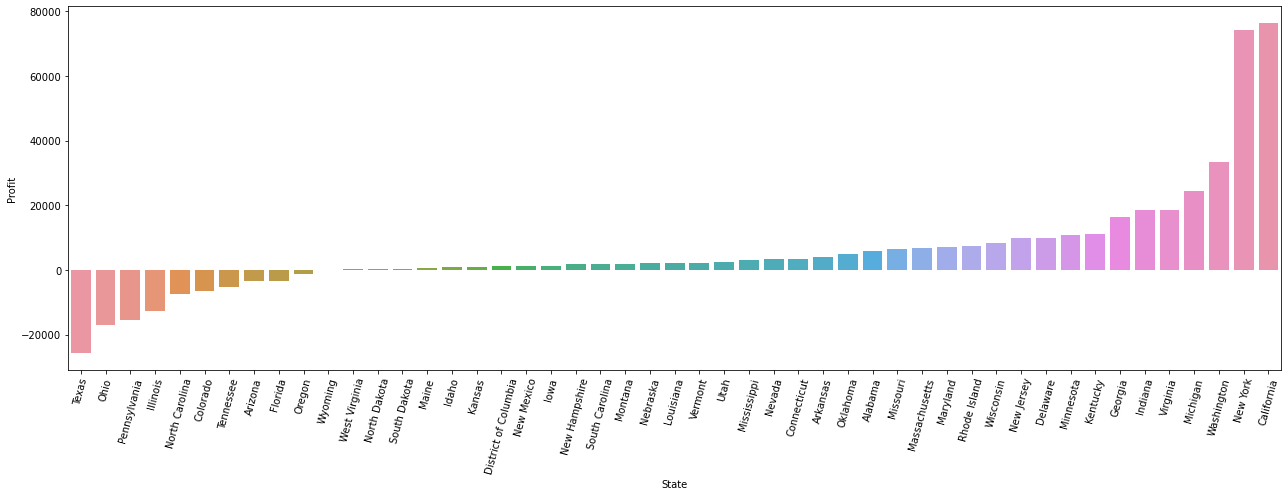

In [200]:
plt.figure(figsize=(18,7))
df8=df.groupby('State').sum().sort_values('Profit')
sns.barplot(x=df8.index,y=df8.Profit)
plt.xticks(rotation=75)
plt.tight_layout()

### Region-wise Analysis

<AxesSubplot:title={'center':'South'}, ylabel='Count'>

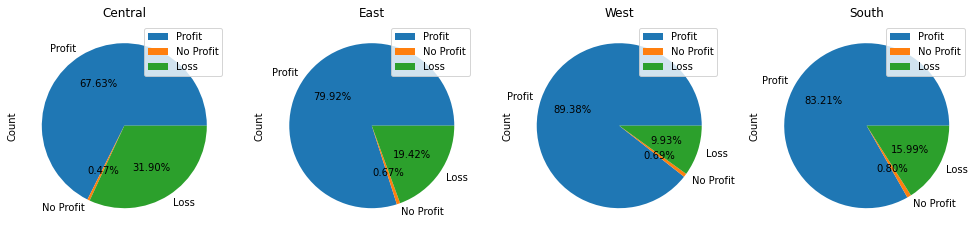

In [208]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(17,7))
axes[0].set_title('Central')
axes[1].set_title('East')
axes[2].set_title('West')
axes[3].set_title('South')
df1=pd.DataFrame({'Count':[df[(df['Profit']>0)&(df['Region']=='Central')]['Profit'].count(),df[(df['Profit']==0)&(df['Region']=='Central')]['Profit'].count(),df[(df['Profit']<0)&(df['Region']=='Central')]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df2=pd.DataFrame({'Count':[df[(df['Profit']>0)&(df['Region']=='East')]['Profit'].count(),df[(df['Profit']==0)&(df['Region']=='East')]['Profit'].count(),df[(df['Profit']<0)&(df['Region']=='East')]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df3=pd.DataFrame({'Count':[df[(df['Profit']>0)&(df['Region']=='West')]['Profit'].count(),df[(df['Profit']==0)&(df['Region']=='West')]['Profit'].count(),df[(df['Profit']<0)&(df['Region']=='West')]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df4=pd.DataFrame({'Count':[df[(df['Profit']>0)&(df['Region']=='South')]['Profit'].count(),df[(df['Profit']==0)&(df['Region']=='South')]['Profit'].count(),df[(df['Profit']<0)&(df['Region']=='South')]['Profit'].count()]},index=['Profit','No Profit','Loss'])
df1.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[0])
df2.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[1])
df3.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[2])
df4.plot.pie(y='Count',autopct='%1.2f%%',ax=axes[3])



## Analysis on Sales Loss

### Sales Loss in Each Region

<AxesSubplot:xlabel='Region', ylabel='Profit'>

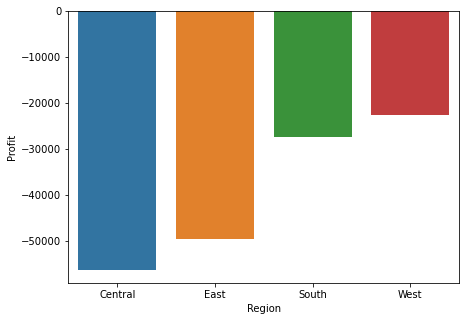

In [213]:
df1=df[df['Profit']<0].groupby('Region').sum().sort_values('Profit')
plt.figure(figsize=(7,5))
sns.barplot(x=df1.index,y=df1.Profit)

### States with Sales Loss in Each Region

In [221]:
c=df[(df['Profit']<0)&(df['Region']=='Central')]['State'].unique()
e=df[(df['Profit']<0)&(df['Region']=='East')]['State'].unique()
w=df[(df['Profit']<0)&(df['Region']=='West')]['State'].unique()
s=df[(df['Profit']<0)&(df['Region']=='South')]['State'].unique()
print("Central:{}".format(c))
print("East:{}".format(e))
print("West:{}".format(w))
print("South:{}".format(s))


Central:['Texas' 'Illinois']
East:['Pennsylvania' 'Ohio' 'New York' 'Massachusetts' 'New Jersey' 'Delaware'
 'Connecticut' 'Rhode Island' 'New Hampshire' 'Maryland' 'West Virginia']
West:['Oregon' 'Colorado' 'Arizona' 'California' 'Washington' 'Nevada'
 'New Mexico']
South:['Florida' 'Tennessee' 'North Carolina']


<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

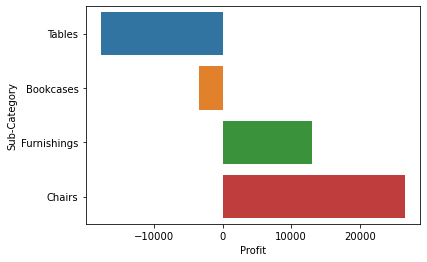

In [223]:
df1=df[df['Category']=='Furniture'].groupby('Sub-Category').sum().sort_values('Profit')
sns.barplot(x=df1.Profit,y=df1.index)

<AxesSubplot:title={'center':'Overall Profit Chairs and Furnishings'}, xlabel='State', ylabel='Profit'>

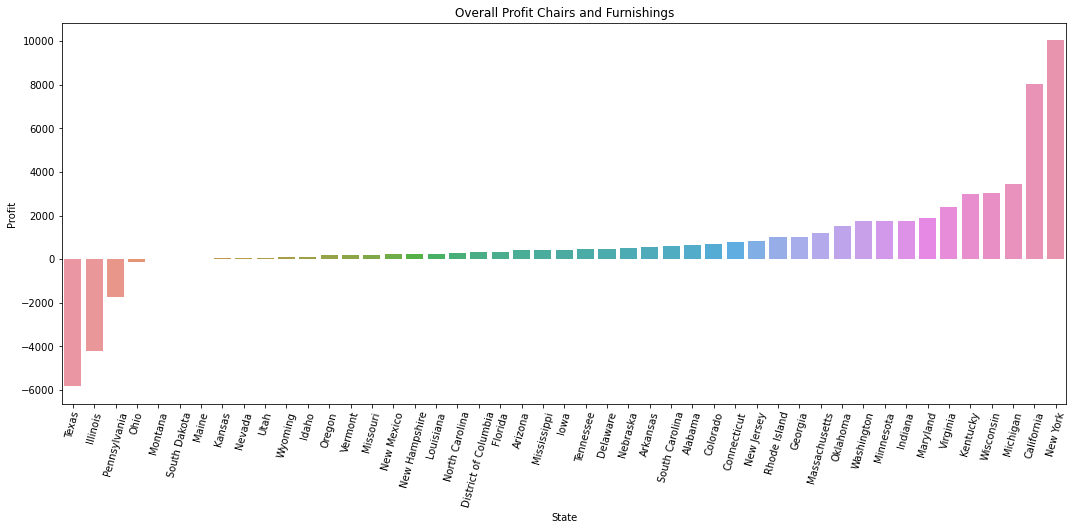

In [230]:
df1=df[(df['Sub-Category']=='Chairs')|(df['Sub-Category']=='Furnishings')].groupby('State').sum().sort_values('Profit')
plt.figure(figsize=(18,7))
plt.xticks(rotation=75)
plt.title('Overall Profit Chairs and Furnishings')
sns.barplot(x=df1.index,y=df1.Profit)



<AxesSubplot:title={'center':'Overall Profit Tables and Bookcases'}, xlabel='State', ylabel='Profit'>

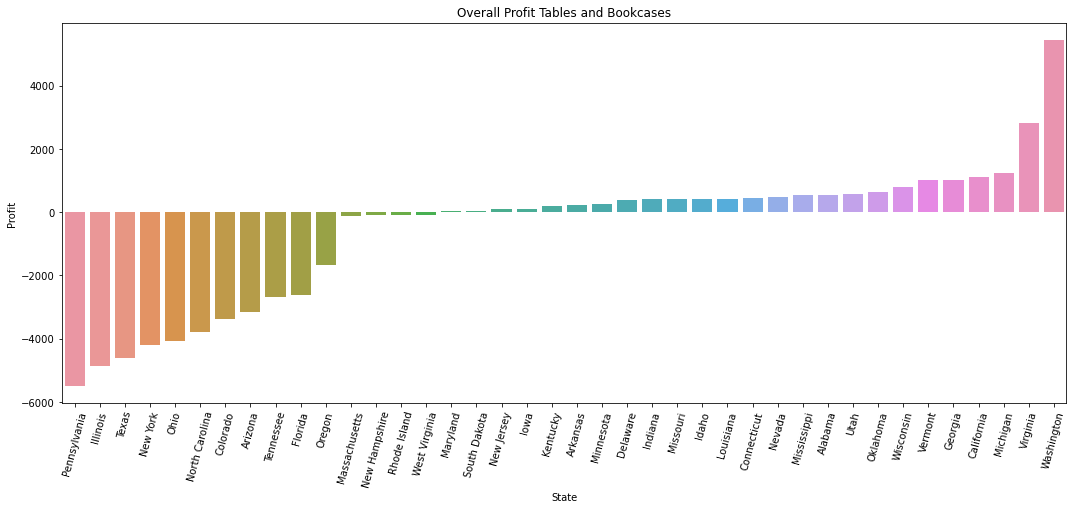

In [231]:
df1=df[(df['Sub-Category']=='Tables')|(df['Sub-Category']=='Bookcases')].groupby('State').sum().sort_values('Profit')
plt.figure(figsize=(18,7))
plt.xticks(rotation=75)
plt.title('Overall Profit Tables and Bookcases')
sns.barplot(x=df1.index,y=df1.Profit)


## Texas and Illinois Sales Analysis

Text(0.5, 1.0, 'Total Sales- Texas & Illinois')

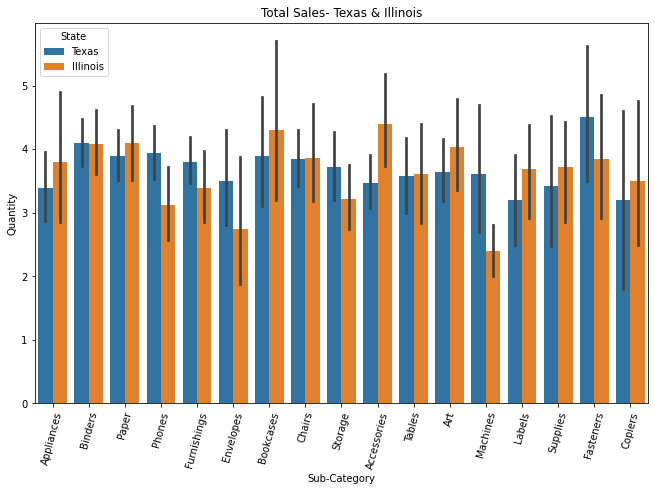

In [244]:
df1=df[(df['State']=='Texas')|(df['State']=='Illinois')]
plt.figure(figsize=(11,7))
plt.xticks(rotation=75)
sns.barplot(x='Sub-Category',y='Quantity',hue='State',data=df1)
plt.title('Total Sales- Texas & Illinois')

### Texas and Illinois - Sales Analysis by Category

<AxesSubplot:title={'center':'Office Supplies'}, xlabel='Profit', ylabel='State'>

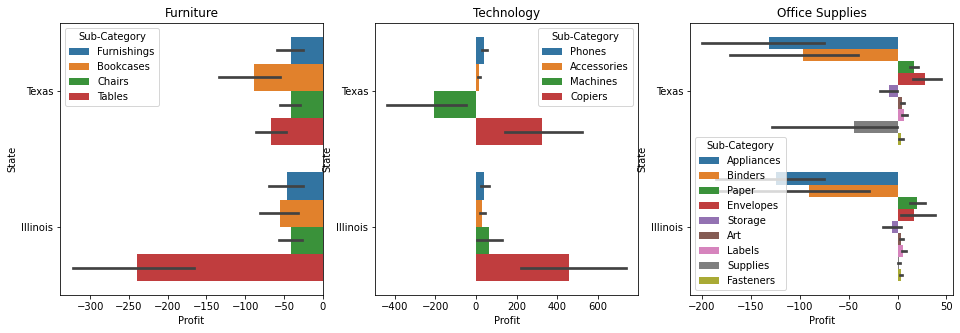

In [250]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,5))
axes[0].set_title('Furniture')
axes[1].set_title('Technology')
axes[2].set_title('Office Supplies')
df1=df[(df['State']=='Texas')|(df['State']=='Illinois')]
df2=df1[df1['Category']=='Furniture']
df3=df1[df1['Category']=='Technology']
df4=df1[df1['Category']=='Office Supplies']
sns.barplot(x='Profit',y='State',hue='Sub-Category',data=df2,ax=axes[0])
sns.barplot(x='Profit',y='State',hue='Sub-Category',data=df3,ax=axes[1])
sns.barplot(x='Profit',y='State',hue='Sub-Category',data=df4,ax=axes[2])

### Sales Profit of Texas & Illinois : -38337.2433

In [252]:
df[(df['State']=='Texas')|(df['State']=='Illinois')]['Profit'].sum()

-38337.2433

### Profit if Avoided Items that can Cause Loss : 13559.2432

In [254]:
df1=df[(df['State']=='Texas')|(df['State']=='Illinois')]
df2=df1[(df1['Category']!='Furniture')&(df1['Sub-Category']!='Technology')&(df1['Sub-Category']!='Binders')&(df1['Sub-Category']!='Appliances')&(df1['Sub-Category']!='Supplies')&(df1['Sub-Category']!='Storage')]
df2[(df2['State']=='Texas')|(df2['State']=='Illinois')]['Profit'].sum()

13559.2432

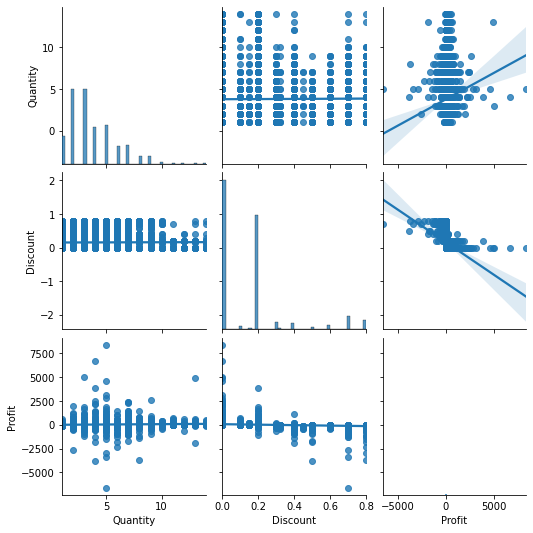

In [261]:
sns.pairplot(df.iloc[:,-3:],kind='reg')

<AxesSubplot:title={'center':'Profit vs Discount'}, xlabel='Discount', ylabel='Profit'>

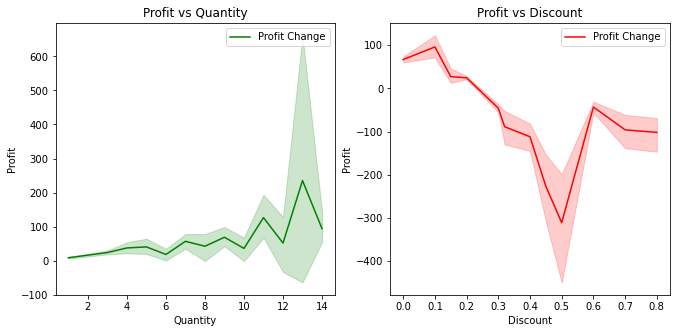

In [264]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(11,5))
axes[0].set_title('Profit vs Quantity')
axes[1].set_title('Profit vs Discount')
sns.lineplot(x='Quantity',y='Profit',data=df,ax=axes[0],color='Green',label='Profit Change')
sns.lineplot(x='Discount',y='Profit',data=df,ax=axes[1],color='Red',label='Profit Change')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

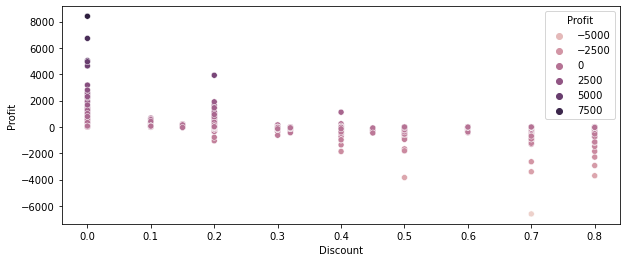

In [267]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Discount',y='Profit',hue='Profit',data=df)

# Business Problems or Key Findings after Analysis

## 1. Supply of Furniture results in high loss especially Tables & Bookcases.
## 2. Texas and Illinois are the states where overall sales are in loss especially in furniture.
## 3.  Sales loss is directly proportional to the discount.
## 4. Central Region faces more loss in sales compared to others.
## 5. Texas,Pennsylvania,Illinois and Ohio are the only states which bear sales loss.
## 6. Other than furniture, Texas and Illinois bear loss in some of the Office-Supplies-   Binders,Appliances & Storage(& Supplies in Texas) and in Technology everything is fine except the sales loss in machines in Texas.
## 7. Profit in a good range for minimal or no discount.

# Solutions

## 1. The Product must sell with low or no discount.
## 2. Instead of the direct discount, the other attractive features can be added with the products like some gift voucher, buy 2 get 1 free etc.
## 3. Minimize supplying furniture (Tables & Bookcases) and the items which result in loss.
## 4. Texas & Illinois must drop the supply of furniture.
## 5. Technology items will enhance the profit of Texas and Illinois especially Copiers.